In [6]:
import seaborn as sns
import pandas as pd
import getpass
import mysql
import numpy as np
from functions import connect_mysql, mysql_list

# Input User id
try:
    # password input hashed
    id = getpass.getpass("id: ") 
except Exception as ex:
    print('Error Occured : ', ex)
#Input password
try:
    # password input hashed
    pwd = getpass.getpass("password: ") 
except Exception as ex:
    print('Error Occured : ', ex)

#host for RDS connection
host = "mdsi-dsp-spr-2020.cehiwpryiego.ap-southeast-2.rds.amazonaws.com"
mydb = connect_mysql(host, id, pwd)

if mydb: 
    print("Connection Successful")

id: ········
password: ········
Connection Successful


Inspect the df for column labels and data integrity

In [7]:
from functions import mysql_list
mydb = connect_mysql(host, id, pwd)
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES;")
# create a list of database
db_list = mysql_list(mycursor.fetchall())
print(db_list) 
# asx is the database to be used
db = "asx"

['asx', 'information_schema', 'mysql', 'performance_schema']


In [8]:
mydb = connect_mysql(host, id, pwd, db)
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES;")
tb_list = mysql_list(mycursor.fetchall())
print(tb_list)

['ASX200_index', 'GDP_history_year', 'asx200', 'asx200_June_2020', 'asx200_month', 'asx_all', 'asx_history', 'asx_s_and_p', 'australia_GDP_1960_2020_usd', 'cashrate', 'exchange_rate', 'national_net_lending', 'net_lending_borrowing', 'new_loan_commitment_value_properties_purchased', 's_and_p', 'unemployment_rate', 'vix']


In [4]:
from IPython.display import display, HTML
mydb = connect_mysql(host, id, pwd, db)

for tb in tb_list:
    df = pd.read_sql_query("SELECT * FROM %s" % (tb), con=mydb)
    print(tb)


ASX200_index
GDP_history_year
asx200
asx200_June_2020
asx200_month
asx_all
asx_history
asx_s_and_p
australia_GDP_1960_2020_usd
cashrate
exchange_rate
national_net_lending
net_lending_borrowing
new_loan_commitment_value_properties_purchased
s_and_p
unemployment_rate
vix


In [9]:
asx_sp = pd.read_sql_query('SELECT * FROM asx_s_and_p', con = mydb)

asx_sp.set_index('date', inplace=True) ## set the date column as the index for the df

asx_sp

,asx_open,s_and_p_open
date,,
1992-12-01,1452.300049,431.350006
1993-01-01,1576.099976,435.700012
1993-02-01,1538.300049,438.779999
1993-03-01,1652.800049,443.380005
1993-04-01,1676.400024,451.670013
...,...,...
2020-07-01,5897.899902,3105.919922
2020-08-01,5927.799805,3288.260010
2020-09-01,6060.500000,3507.439941


In [10]:
mavg = asx_sp.rolling(window=12).mean()
mavg

,asx_open,s_and_p_open
date,,
1992-12-01,NaN,NaN
1993-01-01,NaN,NaN
1993-02-01,NaN,NaN
1993-03-01,NaN,NaN
1993-04-01,NaN,NaN
...,...,...
2020-07-01,6333.983358,3002.839172
2020-08-01,6260.250000,3028.500834
2020-09-01,6214.941650,3078.369995


<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'ASX200 compared with S&P 500 1992 - Present -- Gross trends')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Price')

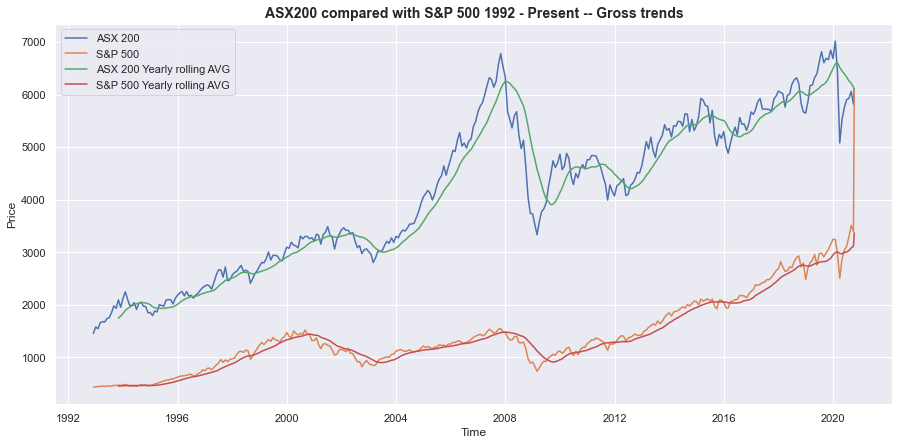

In [11]:
sns.set()

plt.figure(figsize=(15,7))

plt.title('ASX200 compared with S&P 500 1992 - Present -- Gross trends', fontsize = 14, fontweight = 'bold')
asx__sp_plot = plt.plot(asx_sp)
mavg_plot = plt.plot(mavg)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(labels = ['ASX 200','S&P 500', 'ASX 200 Yearly rolling AVG', 'S&P 500 Yearly rolling AVG'])

Findings and Questions for further investigation:
 - The period 2007 to mid 2008 need investigation - what happened in Australia compared with the US markets?
 - It appears the ASX200 is more volatile than the S&P500 across the period. 

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'ASX200 compared with S&P 500 1992 - Present')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Price Difference')

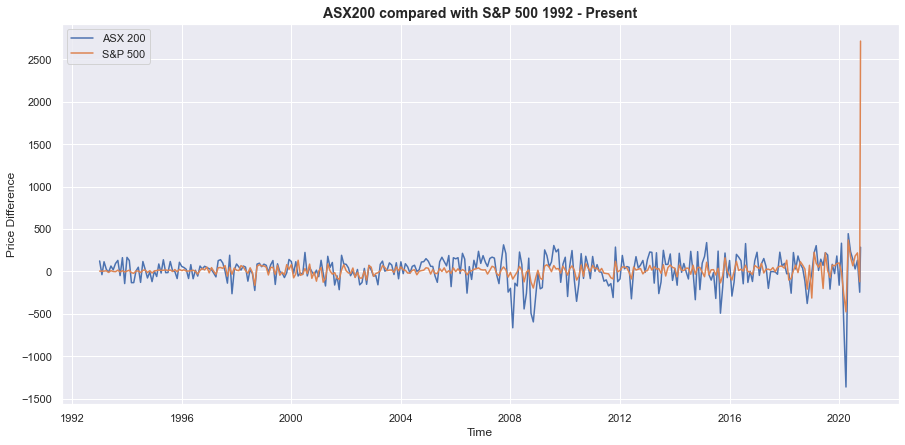

In [12]:
plt.figure(figsize=(15,7))
plt.title('ASX200 compared with S&P 500 1992 - Present', fontsize = 14, fontweight = 'bold')
plt.xlabel('Time')
plt.ylabel('Price Difference')
diff_plot = plt.plot(asx_sp.diff(periods = 1)) ## Get the difference between the months in each columns
plt.legend(labels = ['ASX 200','S&P 500'])

It appears that the ASX is more volatile than the S&P 500. The gains are much greateer but so are the loses in raw figure terms. 

In [13]:
AU_US_corr = asx_sp.pct_change()
AU_US_corr
corr = AU_US_corr.corr()
corr

,asx_open,s_and_p_open
date,,
1992-12-01,NaN,NaN
1993-01-01,0.085244,0.010085
1993-02-01,-0.023983,0.007069
1993-03-01,0.074433,0.010484
1993-04-01,0.014279,0.018697
...,...,...
2020-07-01,0.024706,0.022094
2020-08-01,0.005070,0.058707
2020-09-01,0.022386,0.066655


,asx_open,s_and_p_open
asx_open,1.000000,0.535695
s_and_p_open,0.535695,1.000000


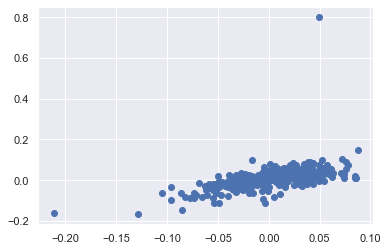

In [14]:
plt.scatter(AU_US_corr.asx_open, AU_US_corr.s_and_p_open)

array([[<AxesSubplot:xlabel='asx_open', ylabel='asx_open'>,
        <AxesSubplot:xlabel='s_and_p_open', ylabel='asx_open'>],
       [<AxesSubplot:xlabel='asx_open', ylabel='s_and_p_open'>,
        <AxesSubplot:xlabel='s_and_p_open', ylabel='s_and_p_open'>]],
      dtype=object)

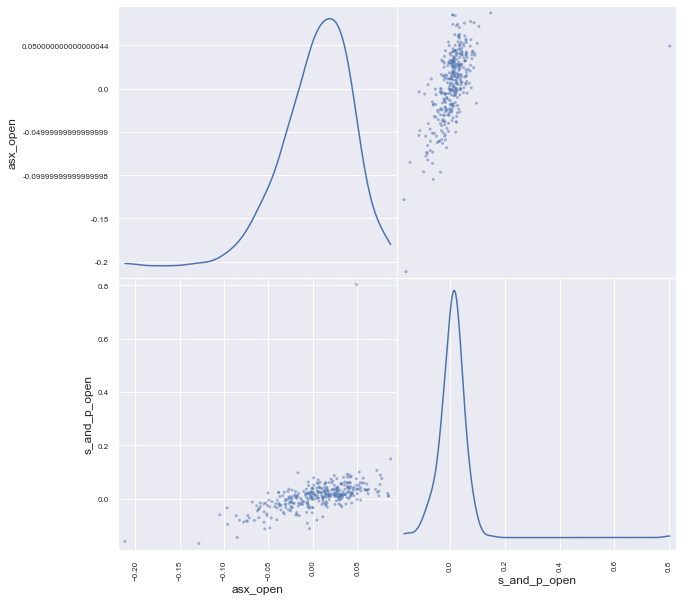

In [68]:
pd.plotting.scatter_matrix(AU_US_corr, diagonal = 'kde', figsize = (10,10))

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'ASX200 and S&P500 correlation')

Text(0.5, 0, 'ASX200')

Text(0, 0.5, 'S&P 500')

TypeError: 'AxesSubplot' object is not callable

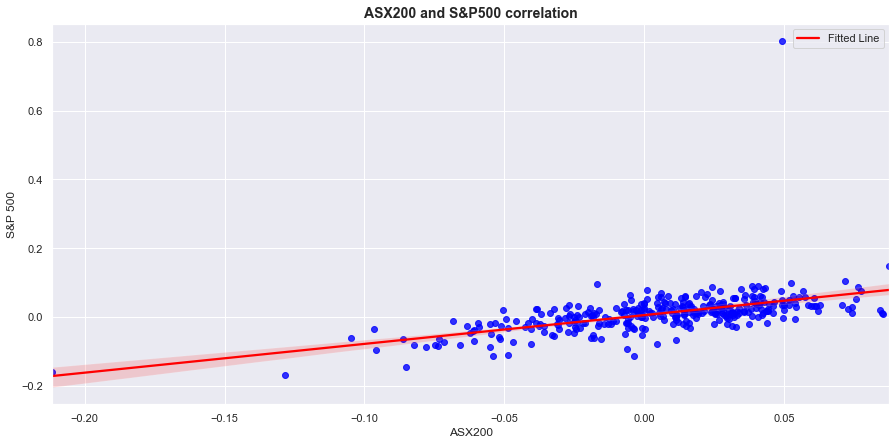

In [27]:
plt.figure(figsize=(15,7))
plt.title('ASX200 and S&P500 correlation', fontsize = 14, fontweight = 'bold')
reg_plot = sns.regplot(x = "asx_open", y = "s_and_p_open", data = AU_US_corr,
           scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('ASX200')
plt.ylabel('S&P 500')
plt.legend(labels = ['Fitted Line'])
reg_plot(corrfunc)

In [28]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)